# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [274]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [323]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 30000)

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [324]:
df.shape

(30000, 15)

In [325]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

This is a dataset about dogs and where they live (owner Zip Code) and when they were born(Animal Birth).

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

Four questions: 1) What area (zip code) is the most dog crowded?
2) What is the most popular breed (Primary Breed)?
3) How many dogs are vaccinated and how many are not?
4) How many dogs are either spayed or neutred?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [326]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

<AxesSubplot:>

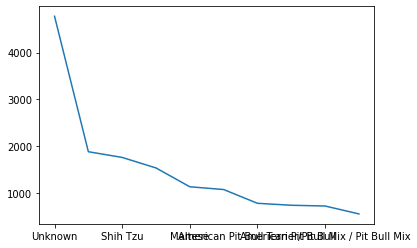

In [327]:
df['Primary Breed'].value_counts().head(10).plot()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [328]:
df = df.dropna(subset=['Primary Breed'])

<AxesSubplot:>

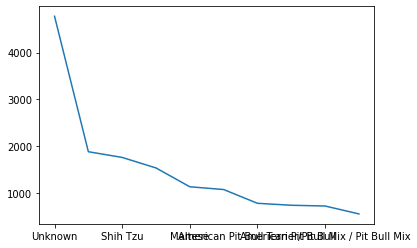

In [329]:
df['Primary Breed'].value_counts().head(10).plot()

## What are the most popular dog names?

In [330]:
df['Animal Name'].value_counts().head(10)

UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [331]:
my_name = ["Evgeniya", "Evgenia", "Zhenya", 'Женя']

In [332]:
df[df['Animal Name'].isin(my_name)].head() 

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date


No dog has my name, I guess

In [333]:
max_name = ["Max"]

In [334]:
df[df['Animal Name'].isin(max_name)].shape

(202, 15)

There are 163 dogs called Max. I try another way to prove it

In [335]:
len(df[df['Animal Name'] == 'Max'])

202

yes, 163 dogs called Max

In [336]:
len(df[df['Animal Name'] == 'Maxwell'])

11

There are 9 dogs called Maxwell

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [337]:
#df = df.dropna(subset = ['Guard or Trained'])

In [338]:
df['Guard or Trained'].value_counts(normalize=True)*100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [339]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [348]:
df['Guard or Trained'].value_counts(dropna=False)

No    30000
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [349]:
df['Guard or Trained'].fillna("No", inplace = True)

df['Guard or Trained'] = df['Guard or Trained'].fillna("No", inplace = True) WHY DOES THAT NOT WORK?

In [350]:
df['Guard or Trained'].value_counts(dropna=False)

No    30000
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [147]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

In [148]:
year

[0        2007
 1        2013
 3        2008
 7        2010
 8        2012
          ... 
 29993    2008
 29995    2010
 29996    2010
 29998    2009
 29999    2012
 Name: Animal Birth, Length: 19826, dtype: int64]

In [149]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [154]:
df['age'] = (2021 - (df['Animal Birth'].apply(lambda birth: birth.year)))

In [151]:
age

[0        14
 1         8
 3        13
 7        11
 8         9
          ..
 29993    13
 29995    11
 29996    11
 29998    12
 29999     9
 Name: Animal Birth, Length: 19826, dtype: int64]

In [156]:
df.age.mean()

13.028245737919903

In [157]:
#df['age'].mean()

13.028245737919903

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [159]:
df_zip = pd.read_csv("zipcodes-neighborhoods.csv")

In [160]:
df_zip

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

## What is the most common dog breed in each of the neighborhoods of NYC?

## What breed of dogs are the least likely to be spayed? Male or female?

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

## How many dogs are in each borough? Plot it in a graph.

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

nlargest

## What percentage of dogs are not guard dogs?